In [2]:
# For numeric opreations
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt

# Main deep learning library
import tensorflow as tf

# For image data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To create sequential model
from tensorflow.keras.models import Sequential

# Import layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D , Conv2D , MaxPooling2D , Flatten

# Different neural network layers
from tensorflow.keras.optimizers import Adam

# Callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For download dataset from kagglehub
import kagglehub

# For handling files path
import os

c:\Users\rb533\ML\chest-xray-pneumonia-detection-main\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# pip uninstall opencv-python -y


Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Note: you may need to restart the kernel to use updated packages.


In [33]:
# pip install kagglehub
# pip install matplotlib

In [ ]:
# pip uninstall ml-dtypes numpy -y

Found existing installation: ml-dtypes 0.2.0
Uninstalling ml-dtypes-0.2.0:
  Successfully uninstalled ml-dtypes-0.2.0
Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install -r requirement.t

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umitka/chest-x-ray-balanced")


print("Path to dataset files:", path)

Path to dataset files: C:\Users\rb533\.cache\kagglehub\datasets\umitka\chest-x-ray-balanced\versions\1


In [5]:
# Listing all files from main dataset
print(os.listdir(path))

# Listing all files inside chest xray balanced directory
print(os.listdir(path + "/chest_xray_balanced"))



['chest_xray_balanced']
['test', 'train', 'train1', 'val', 'val1']


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os


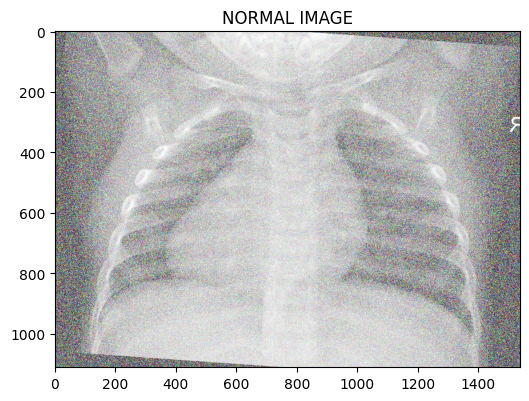

In [7]:
# Constructing the path to the folder containing normal chest x_ray images
image_folder = os.path.join(path , "chest_xray_balanced" , "train" , "NORMAL")



# Selecting 8 image from the folder
image_file = os.listdir(image_folder)[7]

# Combine full path
image_path = os.path.join(image_folder , image_file)

try:

    # Opening image using PIL
    img = Image.open(image_path)

    # Show images using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img , cmap="gray")
    plt.title("NORMAL IMAGE")
    plt.axis="off"
    plt.show()

except Exception as e:
   print(f"YOU HAVE PROBLEM IN THE LOADING{e}")


In [5]:
# Display helthy and sick peoples from dataset

train_hel = os.listdir(path + "/chest_xray_balanced/train/NORMAL")
train_sick = os.listdir(path + "/chest_xray_balanced/train/PNEUMONIA")
test_hel = os.listdir(path + "/chest_xray_balanced/test/NORMAL")
test_sick = os.listdir(path + "/chest_xray_balanced/test/PNEUMONIA")
val_hel = os.listdir(path + "/chest_xray_balanced/val/NORMAL")
val_sick = os.listdir(path + "/chest_xray_balanced/val/PNEUMONIA")





print("Length of healthy peoples into train folder :....." , len(train_hel))
print("Length of unhealthy peoples into train folder :......" , len(train_sick))

print("\nLength of helthy peoples into test folder :..." , len(test_hel))
print("Length of unhelthy peoples into test folder :....." , len(test_sick))

print("\nLength of helthy peoples into val folder :...." ,len(val_hel))
print("Length of unhelthy peoples into val folder :...." , len(val_sick))

Length of healthy peoples into train folder :..... 4000
Length of unhealthy peoples into train folder :...... 4000

Length of helthy peoples into test folder :... 400
Length of unhelthy peoples into test folder :..... 400

Length of helthy peoples into val folder :.... 400
Length of unhelthy peoples into val folder :.... 400


In [6]:
from PIL import Image
# Constructing full path to the first image from normal dataset
image_path = path + "/chest_xray_balanced/train/NORMAL/" + os.listdir(path + "/chest_xray_balanced/train/NORMAL")[0]

# Open image
img = Image.open(image_path)

# Print image size
print("Image size" , img.size)

Image size (1678, 1319)


In [ ]:
# pip install scikit-learn

In [8]:
from sklearn.utils import validation

# Create an image that rescale pixels values to 0-1
data_gen = ImageDataGenerator(
                              rescale=1./255.0
                              )

In [9]:
# Normalize image pixels to range 0-1
train_data = data_gen.flow_from_directory(

                                        path + "/chest_xray_balanced/train",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\train"
                                         target_size=(150 , 150),
                                         batch_size = 50,
                                         class_mode = "binary"

                                         )

Found 8000 images belonging to 2 classes.


In [ ]:
# TRAIN_DIR = path + "/chest_xray_balanced/train1"

# NORMAL_DIR = os.path.join(TRAIN_DIR, "NORMAL")
# PNEUMONIA_DIR = os.path.join(TRAIN_DIR, "PNEUMONIA")


In [ ]:
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=7,          # 🔴 very small
#     width_shift_range=0.03,
#     height_shift_range=0.03,
#     zoom_range=0.05,
#     horizontal_flip=True,
#     fill_mode="nearest"
# )


In [139]:
# normal_gen = datagen.flow_from_directory(
#     TRAIN_DIR,
#     classes=["NORMAL"],
#     target_size=(150,150),
#     batch_size=1,
#     save_to_dir=NORMAL_DIR,
#     save_prefix="aug_norm",
#     save_format="jpg"
# )

# for i in range(156):   # jitna badhaana ho
#     next(normal_gen)


In [ ]:
# pneumonia_gen = datagen.flow_from_directory(
#     TRAIN_DIR,
#     classes=["PNEUMONIA"],
#     target_size=(150,150),
#     batch_size=1,
#     save_to_dir=PNEUMONIA_DIR,
#     save_prefix="aug_pneu",
#     save_format="jpg"
# )

# for i in range(1800):
#     next(pneumonia_gen)


Found 2256 images belonging to 1 classes.


In [138]:
print("NORMAL images:", len(os.listdir(NORMAL_DIR)))
print("PNEUMONIA images:", len(os.listdir(PNEUMONIA_DIR)))


NORMAL images: 1287
PNEUMONIA images: 1422


In [10]:
# Normalize image pixels to range 0-1 of testing data
test_data = data_gen.flow_from_directory(

                                         path + "/chest_xray_balanced/test",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\test",
                                         target_size=(150 , 150),
                                         batch_size = 50,
                                         class_mode = "binary",
                                         shuffle = False

                                         )

Found 800 images belonging to 2 classes.


In [11]:
# Normalize image pixels to range 0-1 of validation data
val_data = data_gen.flow_from_directory(
                                         path + "/chest_xray_balanced/val",
                                        #  "C:\Users\rb533\ML\pnuemonia kaggle\dataset\peadiatric\val",
                                         target_size=(150 , 150),
                                         batch_size = 50,
                                         class_mode = "binary",
                                         shuffle=False

                                         )

Found 800 images belonging to 2 classes.


In [14]:
train_data.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

In [15]:
# Creating a CNN model
model = Sequential([

                    # First convolutional layer with 64 filters and kernal and relu activation
                    Conv2D(64 , (3,3) , activation="relu" , input_shape=(150 , 150 , 3)),
                    # Maxpooling2D layer to reduce spatial dimensions
                    MaxPooling2D(3,3),

                    Conv2D(128 , (3,3) , activation="relu"),
                    MaxPooling2D(3,3),

                    Conv2D(215, (3,3), activation='relu'),
                    MaxPooling2D(3,3),

                    # Flattening 3D feature maps to 1D vector
                    Flatten(),

                    # Fully connected layer
                    Dense(128 , activation = "relu"),
                    Dropout(0.5),

                    Dense(1 , activation="sigmoid")

                   ])

In [16]:
#  vgg16 model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten

base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)


In [27]:
# VGG19 model
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze VGG19 layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)   # 🔥 Better than Flatten
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)




In [34]:
# ResNet50 model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze backbone
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)   # 🔥 Best practice
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)



In [38]:
# AlexNet model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

model = Sequential([

    # 🔹 Layer 1
    Conv2D(96, (11,11), strides=4, activation="relu",
           input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # 🔹 Layer 2
    Conv2D(256, (5,5), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # 🔹 Layer 3
    Conv2D(384, (3,3), padding="same", activation="relu"),

    # 🔹 Layer 4
    Conv2D(384, (3,3), padding="same", activation="relu"),

    # 🔹 Layer 5
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(3,3), strides=2),

    # 🔹 Classifier
    Flatten(),
    Dense(4096, activation="relu"),
    Dropout(0.5),
    Dense(4096, activation="relu"),
    Dropout(0.5),

    Dense(1, activation="sigmoid")
])



In [49]:
#DenseNet121 model
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze DenseNet layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)   # 🔥 Best practice
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)



In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

# Compile to the model
model.compile(

              optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]
)

# Displaying the summary of model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 215)       247895    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 215)         

In [17]:
# early_stop = EarlyStopping(verbose=1 , monitor="val_loss" , patience=2)





# Train model on training data
history = model.fit(

                    train_data,
                    validation_data=val_data,

                    epochs=8,
                    verbose=1,
                    # callbacks=[early_stop],

                    )

Epoch 1/8


160/160 [==============================] - 482s 3s/step - loss: 0.3190 - accuracy: 0.8549 - precision: 0.8483 - recall: 0.8643 - auc: 0.9355 - val_loss: 0.4039 - val_accuracy: 0.8000 - val_precision: 0.7190 - val_recall: 0.9850 - val_auc: 0.9704
Epoch 2/8
160/160 [==============================] - 261s 2s/step - loss: 0.1674 - accuracy: 0.9369 - precision: 0.9324 - recall: 0.9420 - auc: 0.9824 - val_loss: 0.2430 - val_accuracy: 0.9062 - val_precision: 0.8571 - val_recall: 0.9750 - val_auc: 0.9817
Epoch 3/8
160/160 [==============================] - 204s 1s/step - loss: 0.1369 - accuracy: 0.9452 - precision: 0.9475 - recall: 0.9427 - auc: 0.9883 - val_loss: 0.2654 - val_accuracy: 0.8838 - val_precision: 0.8191 - val_recall: 0.9850 - val_auc: 0.9855
Epoch 4/8
160/160 [==============================] - 198s 1s/step - loss: 0.1139 - accuracy: 0.9553 - precision: 0.9550 - recall: 0.9555 - auc: 0.9917 - val_loss: 0.2291 - val_accuracy: 0.9050 - val_precision: 0.8506 - val_recall:

In [18]:
# Evaluate model on testdata data
test_loss , test_acc , test_prec, test_rec,test_auc = model.evaluate(test_data)

# Print model accuracy
print("Accuracy" , test_acc)
print("Precision" , test_prec)
print("Recall" , test_rec)
print("AUC" , test_auc)

# Print model loss
print("Loss" , test_loss)

16/16 [==============================] - 10s 630ms/step - loss: 0.1336 - accuracy: 0.9488 - precision: 0.9165 - recall: 0.9875 - auc: 0.9923
Accuracy 0.9487500190734863
Precision 0.9164733290672302
Recall 0.987500011920929
AUC 0.992256224155426
Loss 0.13359759747982025


In [26]:
test_data.reset()

In [27]:
from sklearn.metrics import classification_report , confusion_matrix

# Numbers of steps convert all test images based on the batch size
STEPS = test_data.n // test_data.batch_size + 1

# Predicting raw probabilities for all test images
Y_pred_raw = model.predict(test_data, steps=STEPS)

# Converting probabilities to binary label using 0.6 threshold
Y_pred = (Y_pred_raw > 0.6).astype(int)

# Getting true label from the test data
Y_true = test_data.classes[:len(Y_pred)]

# Showing classification report
print("Classification Report" , classification_report(Y_true , Y_pred , target_names=["NORMAL", "PNEUMONIA"]))

# Showing confusion metrix
print("\nConfusion Matrix" , confusion_matrix(Y_true , Y_pred))

17/17 [==============================] - 14s 789ms/step
Classification Report               precision    recall  f1-score   support

      NORMAL       0.49      0.92      0.64       400
   PNEUMONIA       0.42      0.06      0.10       400

    accuracy                           0.49       800
   macro avg       0.45      0.49      0.37       800
weighted avg       0.45      0.49      0.37       800


Confusion Matrix [[369  31]
 [378  22]]


In [ ]:
import tensorflow as tf

# Set model name
# MODEL_FILENAME = "Adult_cnn_model2.keras"

# Saving model
# model.save(MODEL_FILENAME)
model.save("ped_cnn_model3.h5")
# print("\nYou model save succesfully.....{MODEL_FILENAME}")

In [12]:
from tensorflow.keras.models import load_model

adult_model = load_model("adult_cnn_model.h5")
pediatric_model = load_model("ped_cnn_model2.h5")


In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

adult_test = test_gen.flow_from_directory(
    path + "/chest_xray_balanced/val1",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

pediatric_test = test_gen.flow_from_directory(
    path + "/chest_xray_balanced/test",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


Found 802 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [15]:
adult_test.reset()
y_true_AA = adult_test.classes
y_score_AA = adult_model.predict(adult_test).ravel()


26/26 [==============================] - 11s 421ms/step


In [16]:
pediatric_test.reset()
y_true_AP = pediatric_test.classes
y_score_AP = adult_model.predict(pediatric_test).ravel()


25/25 [==============================] - 9s 358ms/step


In [17]:
pediatric_test.reset()
y_true_PP = pediatric_test.classes
y_score_PP = pediatric_model.predict(pediatric_test).ravel()


25/25 [==============================] - 9s 349ms/step


In [18]:
adult_test.reset()
y_true_PA = adult_test.classes
y_score_PA = pediatric_model.predict(adult_test).ravel()


26/26 [==============================] - 18s 678ms/step


In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [20]:
def plot_roc(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC={roc_auc:.3f})")
    return roc_auc


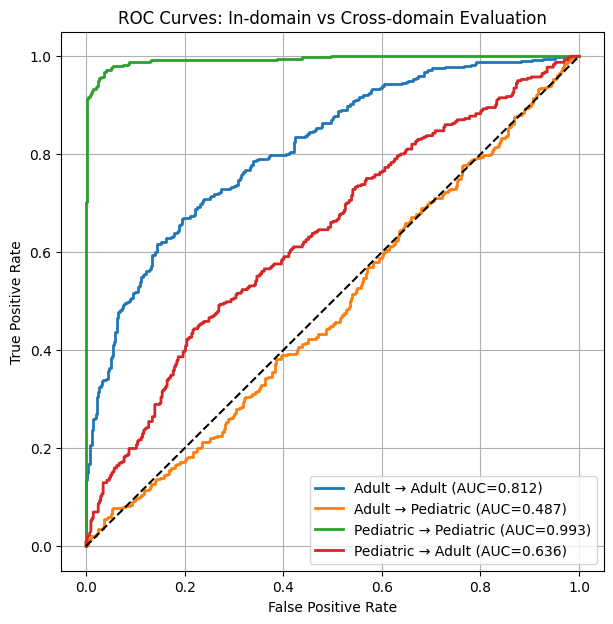

In [21]:
plt.figure(figsize=(7,7))

auc_AA = plot_roc(y_true_AA, y_score_AA, "Adult → Adult")
auc_AP = plot_roc(y_true_AP, y_score_AP, "Adult → Pediatric")
auc_PP = plot_roc(y_true_PP, y_score_PP, "Pediatric → Pediatric")
auc_PA = plot_roc(y_true_PA, y_score_PA, "Pediatric → Adult")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves: In-domain vs Cross-domain Evaluation")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [22]:
print("Adult model AUC drop:", auc_AA - auc_AP)
print("Pediatric model AUC drop:", auc_PP - auc_PA)


Adult model AUC drop: 0.3255081943675723
Pediatric model AUC drop: 0.3576002830361751


In [ ]:
## YAHN SE DEKHENGE AAGE

In [ ]:
# yahan se  dekhenge aage
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
y_true = val_data.classes   # ya test_data.classes


In [ ]:
val_data.reset()   # ⚠️ must, warna labels mismatch ho jaate hain

y_scores = model.predict(val_data)
y_scores = y_scores.ravel()   # shape (N,)


In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)


In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label="ROC curve (AUC = %0.3f)" % roc_auc)

plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--",
         label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Pneumonia Detection")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# YAHAN TAK

PREDICTION ON SINGLE IMAGE

In [29]:
import tensorflow as tf
# import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [30]:
MODEL_PATH = "Adult_cnn_model2.h5"   # 🔴 apne model ka exact path

model = load_model(MODEL_PATH)
print("✅ Model loaded successfully")


✅ Model loaded successfully


In [31]:
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0          # normalization
    img_array = np.expand_dims(img_array, axis=0)  # batch dimension
    return img_array


In [32]:
def predict_pneumonia(img_path, model, threshold=0.5):
    img_array = load_and_preprocess_image(img_path)

    prediction = model.predict(img_array)[0][0]

    if prediction >= threshold:
        label = "PNEUMONIA"
    else:
        label = "NORMAL"

    return label, float(prediction)


In [35]:
img_path = "Pnuemonia_adult2.png"   # 🔴 test image

label, prob = predict_pneumonia(
    img_path,
    model,
    threshold=0.5    # medical case me 0.4 bhi try kar sakte ho
)

print("🩺 Prediction:", label)
print("📊 Pneumonia Probability:", round(prob, 4))


1/1 [==============================] - 0s 36ms/step
🩺 Prediction: NORMAL
📊 Pneumonia Probability: 0.4057


In [26]:
models = [
    "Our Model",
    "VGG19",
    "VGG16",
    "ResNet50",
    "AlexNet",
    "DenseNet121"
]

# my_accuracy = [98.66, 95.85, 98.61, 86.54, 97.39, 97.54]
# paper_accuracy = [98.60, 97.0, 96.3, 83.6, 81.0, 95.2]
accuracy_comparison = [98.60, 97.0, 96.3, 83.6, 81.0, 95.2]


C:\Users\rb533\AppData\Local\Temp\ipykernel_19696\1342038067.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", frameon=True)


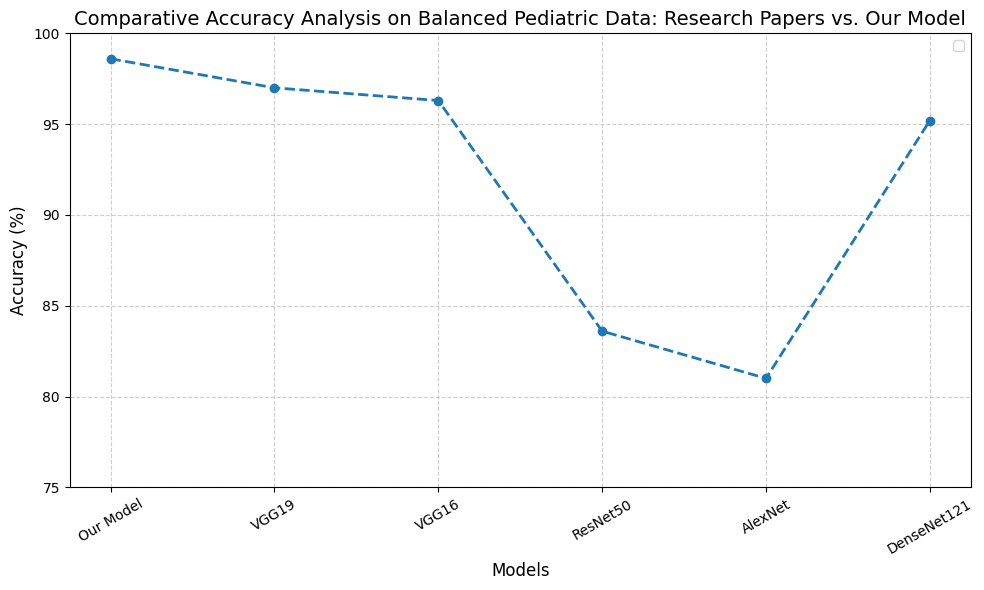

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Research paper results
plt.plot(
    models,
    accuracy_comparison,
    # paper_accuracy,
    marker='o',
    linestyle='--',
    linewidth=2,
    # label='Research Paper Accuracy'
)

# Your results
# plt.plot(
#     models,
#     my_accuracy,
#     marker='s',
#     linestyle='-',
#     linewidth=2,
#     label='My Model Accuracy'
# )

plt.title("Comparative Accuracy Analysis on Balanced Pediatric Data: Research Papers vs. Our Model", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)

plt.ylim(75, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="upper right", frameon=True)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


C:\Users\rb533\AppData\Local\Temp\ipykernel_19696\1831272251.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", frameon=True)


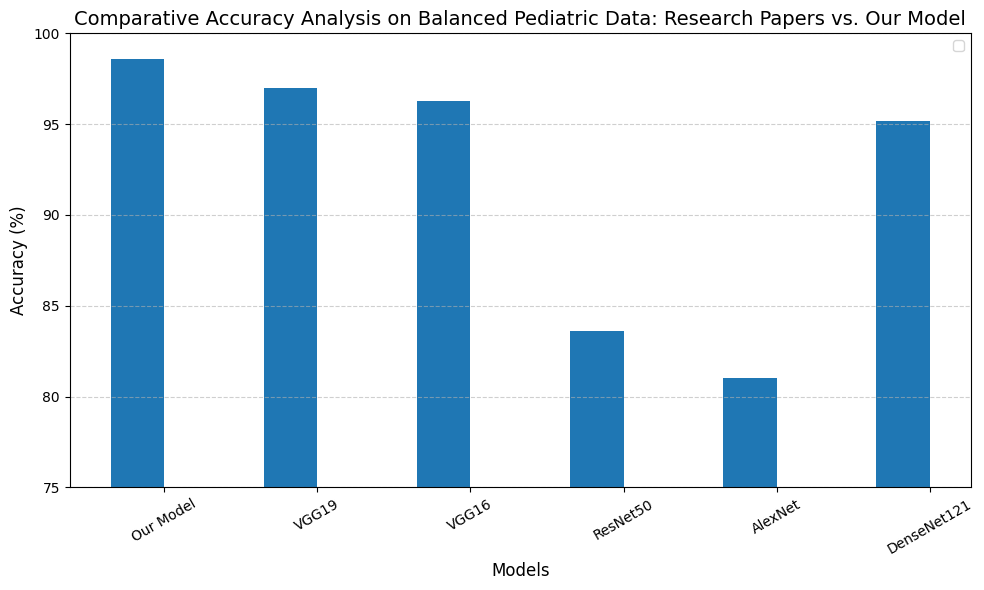

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(models))      # label locations
width = 0.35                    # bar width

plt.figure(figsize=(10,6))

# Research paper bars
plt.bar(
    x - width/2,
    accuracy_comparison,
    # paper_accuracy,
    width,
    # label="Research Paper Accuracy"
)

# Your model bars
# plt.bar(
#     x + width/2,
#     my_accuracy,
#     width,
#     label="My Model Accuracy"
# )

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Comparative Accuracy Analysis on Balanced Pediatric Data: Research Papers vs. Our Model", fontsize=14)

plt.xticks(x, models, rotation=30)
plt.ylim(75, 100)
plt.legend(loc="upper right", frameon=True)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [53]:
models = [
    "Custom CNN",
    "VGG16",
    "VGG19",
    "ResNet50",
    "AlexNet",
    "DenseNet121"
]

ped_ped_accuracy = [
    99.66,   # Custom CNN
    98.61,   # VGG16
    95.85,   # VGG19
    86.54,   # ResNet50
    97.39,   # AlexNet
    97.54    # DenseNet121
]


ped_adult_accuracy = [
    98.75,   # Custom CNN
    98.34,   # VGG16
    95.78,   # VGG19
    86.15,   # ResNet50
    97.84,   # AlexNet
    97.43    # DenseNet121
]



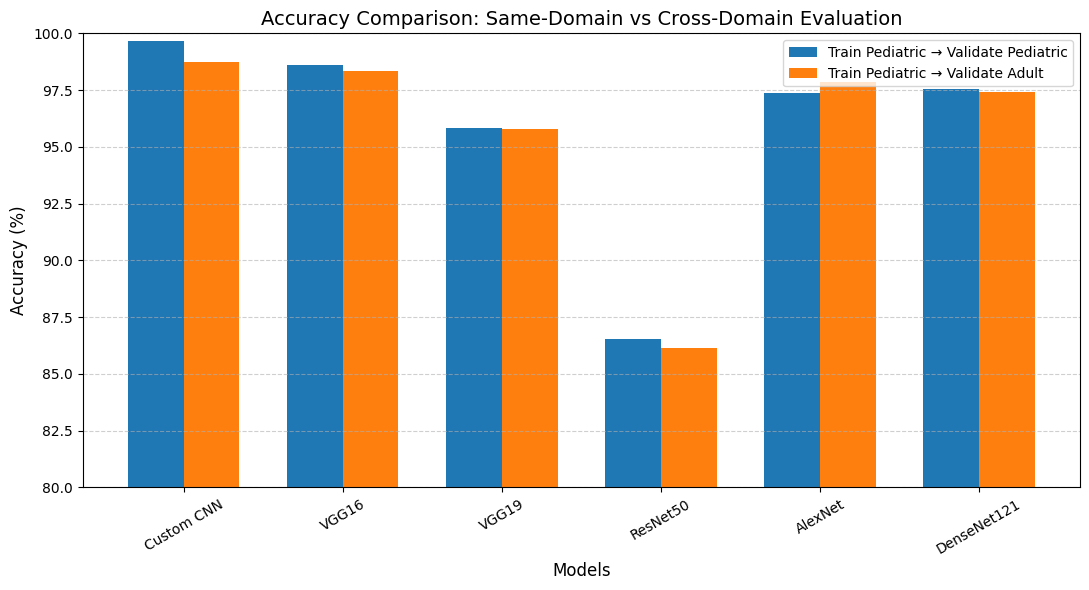

In [55]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(11,6))

plt.bar(
    x - width/2,
    ped_ped_accuracy,
    width,
    label="Train Pediatric → Validate Pediatric"
)

plt.bar(
    x + width/2,
    ped_adult_accuracy,
    width,
    label="Train Pediatric → Validate Adult"
)

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title(
    "Accuracy Comparison: Same-Domain vs Cross-Domain Evaluation",
    fontsize=14
)

plt.xticks(x, models, rotation=30)
plt.ylim(80, 100)
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [56]:
accuracy_drop = [
    ped_ped_accuracy[i] - ped_adult_accuracy[i]
    for i in range(len(models))
]


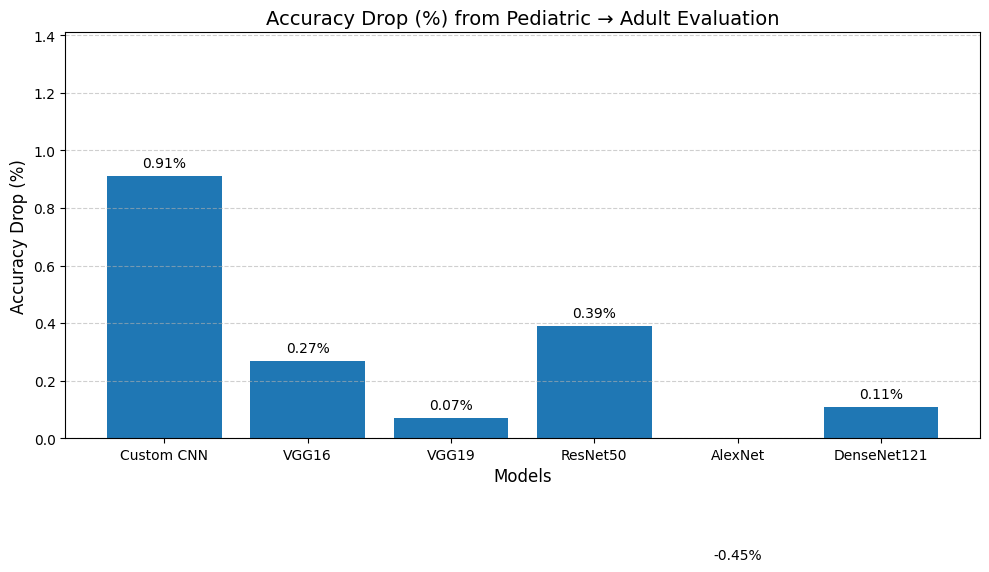

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

bars = plt.bar(
    models,
    accuracy_drop
)

plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Drop (%)", fontsize=12)
plt.title(
    "Accuracy Drop (%) from Pediatric → Adult Evaluation",
    fontsize=14
)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.ylim(0, max(accuracy_drop) + 0.5)

# 🔹 Annotate values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f"{height:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [ ]:
# pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [192]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [193]:
def load_and_preprocess_image(img_path, target_size=(224,224)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array


In [195]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_output = predictions[:, 0]   # binary classification

    grads = tape.gradient(class_output, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [196]:
def overlay_gradcam(img, heatmap, alpha=0.4):
    img = np.array(img)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    return superimposed_img


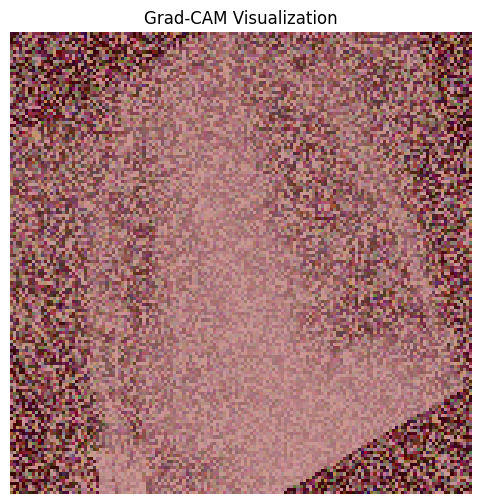

In [202]:
# img_path = "augmented_3140.jpg"
# img_path = "person16_bacteria_53.jpeg"
img_path = "ped_pnuemonia3.jpg"

img, img_array = load_and_preprocess_image(
    img_path,
    target_size=(150,150)   # 🔴 CNN ka input size
)

heatmap = make_gradcam_heatmap(
    img_array,
    model,
    last_conv_layer_name="conv2d_23"   # ✅ Custom CNN ka last conv
)


cam_image = overlay_gradcam(img, heatmap)

plt.figure(figsize=(6,6))
plt.imshow(cam_image)
plt.gca().axis("off")
plt.title("Grad-CAM Visualization")
plt.show()


gradcam++

In [39]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [40]:
def load_and_preprocess_image(img_path, target_size=(150,150)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array


In [41]:
def make_gradcam_plus_plus_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape1:
        with tf.GradientTape() as tape2:
            with tf.GradientTape() as tape3:
                conv_outputs, predictions = grad_model(img_array)
                loss = predictions[:, 0]

            grads = tape3.gradient(loss, conv_outputs)
        grads2 = tape2.gradient(grads, conv_outputs)
    grads3 = tape1.gradient(grads2, conv_outputs)

    conv_outputs = conv_outputs[0]
    grads = grads[0]
    grads2 = grads2[0]
    grads3 = grads3[0]

    numerator = grads2
    denominator = 2 * grads2 + grads3 * conv_outputs
    denominator = tf.where(denominator != 0.0, denominator, tf.ones_like(denominator))

    alpha = numerator / denominator
    weights = tf.reduce_sum(alpha * tf.nn.relu(grads), axis=(0, 1))

    heatmap = tf.reduce_sum(weights * conv_outputs, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap = heatmap / tf.reduce_max(heatmap)

    return heatmap.numpy()


In [42]:
def overlay_gradcam(img, heatmap, alpha=0.4):
    img = np.array(img)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img


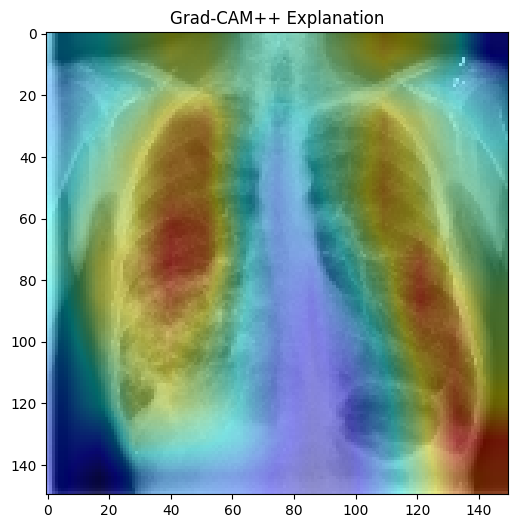

In [44]:

# img_path = "augmented_3140.jpg"
img_path = "Pnuemonia_adult4.png"
# img_path = "ped_pnuemonia7.jpg"
# img_path = "ped_pnuemonia13.jpeg"

# img_path = "person25_bacteria_117.jpeg"
# img_path = "person25_bacteria_117.jpeg"

img, img_array = load_and_preprocess_image(img_path)

heatmap = make_gradcam_plus_plus_heatmap(
    img_array,
    model,
    last_conv_layer_name="conv2d_2"   # ⚠️ model.summary() se confirm karo
)

cam_image = overlay_gradcam(img, heatmap)

plt.figure(figsize=(6,6))
plt.imshow(cam_image)
# plt.axis("off")
plt.title("Grad-CAM++ Explanation")
plt.show()
